In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("GPU is not available. Using CPU.")

# Example usage:
# tensor = torch.tensor([1, 2, 3]).to(device)

In [23]:
annotation_path = "Datasets\HRSID_JPG\\annotations\\train_test2017.json"
image_folder = "Datasets/HRSID_JPG/JPEGImages"

In [ ]:
import json

# Read the JSON data from the file
with open(annotation_path, 'r') as file:
    annotations_data = json.load(file)

# Access the 'images' and 'annotations' sections of the data
images = annotations_data['images']
annotations = annotations_data['annotations']

# Map annotations to their respective images using 'image_id'
annotations_mapping = {}
for annotation in annotations:
    image_id = annotation['image_id']
    if image_id not in annotations_mapping:
        annotations_mapping[image_id] = []
    annotations_mapping[image_id].append(annotation)

# Now, 'annotations_mapping' contains a mapping of image IDs to their respective annotations
# You can use this mapping to associate annotations with their corresponding images

# Example usage:
for image in images:
    image_id = image['id']
    if image_id in annotations_mapping:
        image_annotations = annotations_mapping[image_id]
        # Now you can work with 'image' and 'image_annotations' as needed
        print(f"Image ID: {image_id}, Image File Name: {image['file_name']}")
        for annotation in image_annotations:
            print(f" - Annotation ID: {annotation['id']}, Category ID: {annotation['category_id']}")


In [20]:
import os
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

# Read the JSON data from the file
with open(annotation_path, 'r') as file:
    annotations_data = json.load(file)

# Access the 'images' section of the data
images = annotations_data['images']

# Create a mapping of image file names to their respective images
image_folder = "Datasets\HRSID_JPG\JPEGImages"
image_mapping = {}
for image_info in images:
    file_name = image_info['file_name']
    image_path = os.path.join(image_folder, file_name)
    image = Image.open(image_path)
    image_mapping[file_name] = image

# Access the 'annotations' section of the data
annotations = annotations_data['annotations']

# Map annotations to their corresponding images using 'image_id'
annotations_mapping = {}
for annotation in annotations:
    image_id = annotation['image_id']
    file_name = images[image_id]['file_name']
    if file_name not in annotations_mapping:
        annotations_mapping[file_name] = []
    annotations_mapping[file_name].append(annotation)


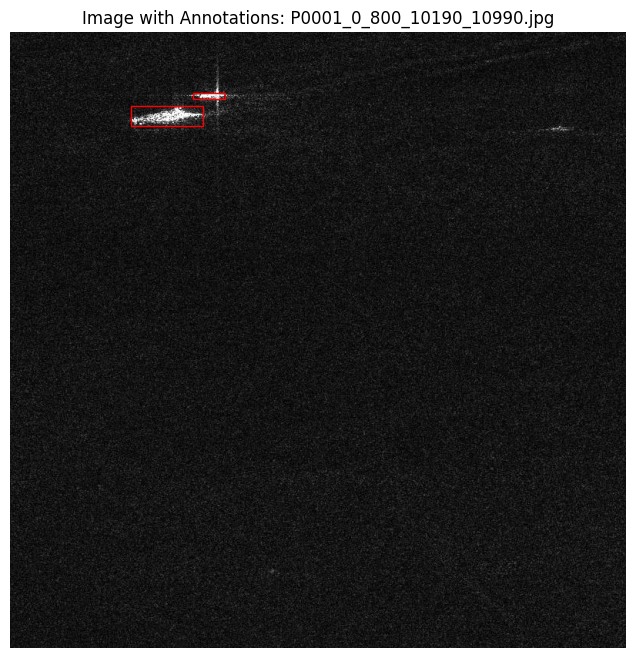

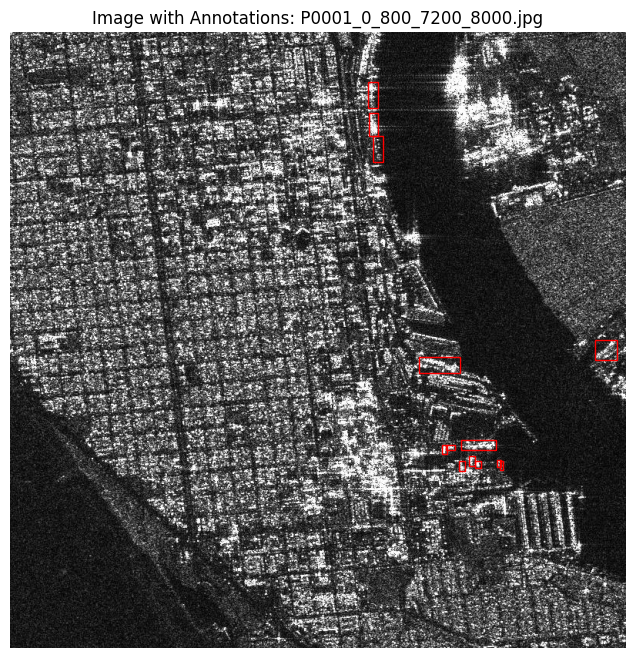

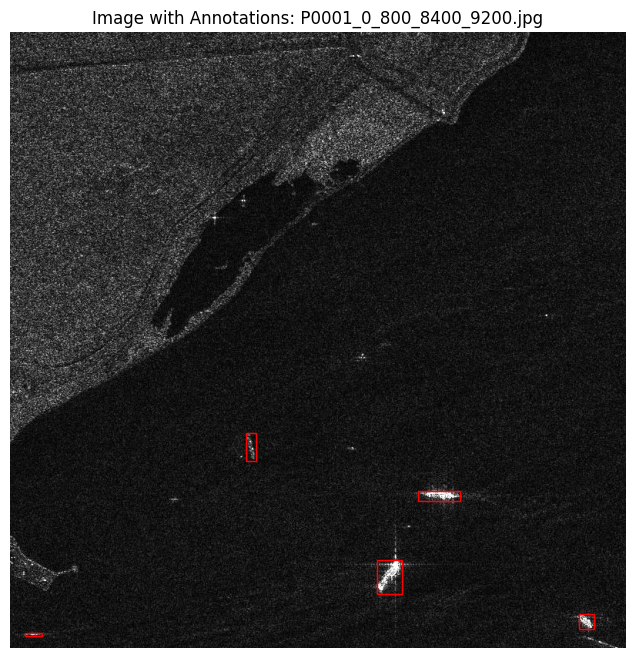

In [21]:
# Display images with bounding boxes

for file_name, annotations in annotations_mapping.items():
    image = image_mapping[file_name]
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    ax = plt.gca()
    for annotation in annotations:
        bbox = annotation['bbox']
        rect = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.title(f"Image with Annotations: {file_name}")
    plt.axis('off')
    plt.show()

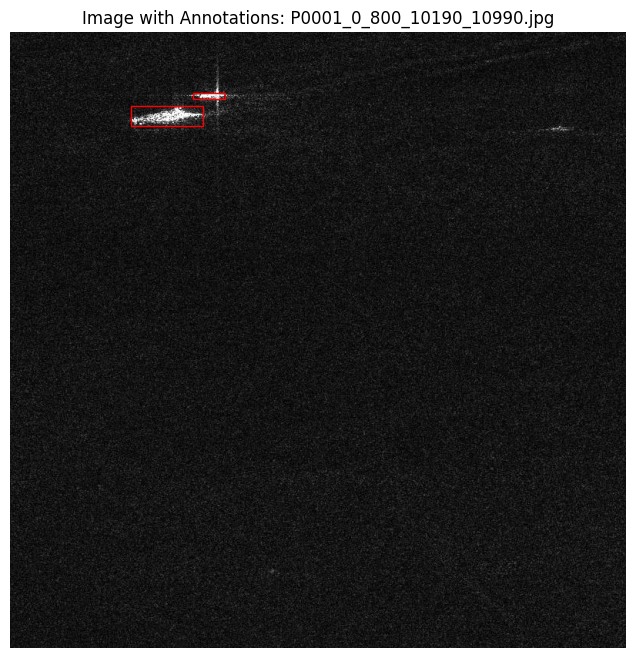

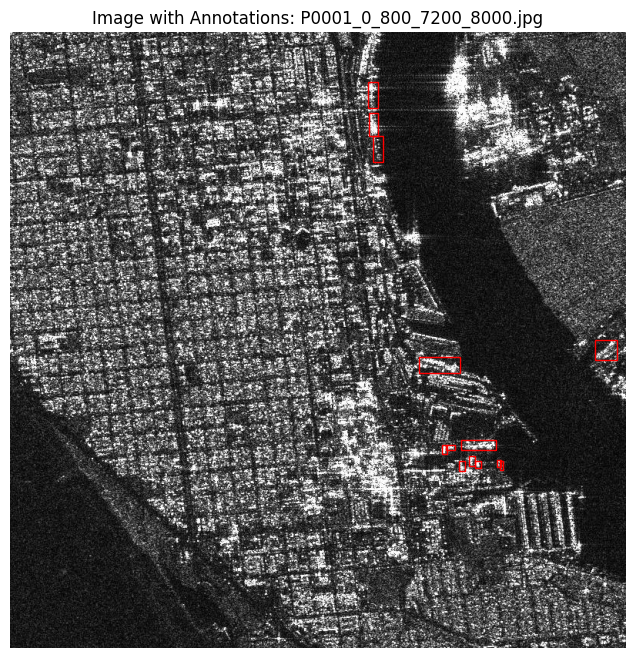

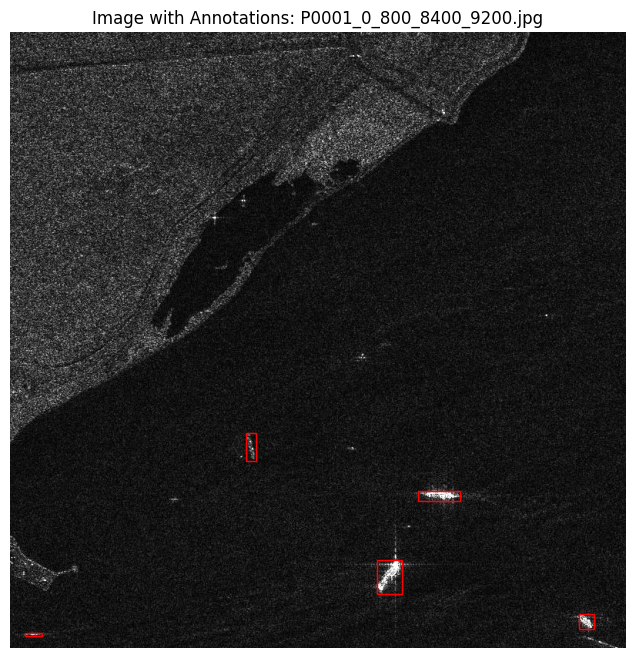

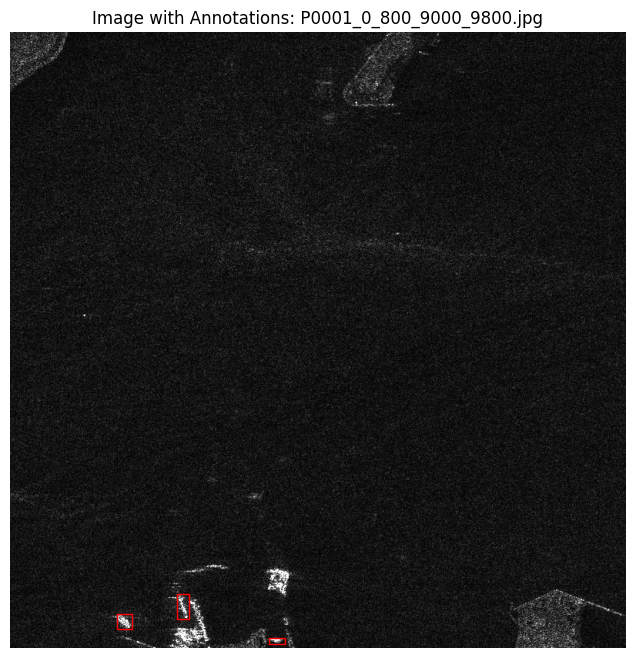

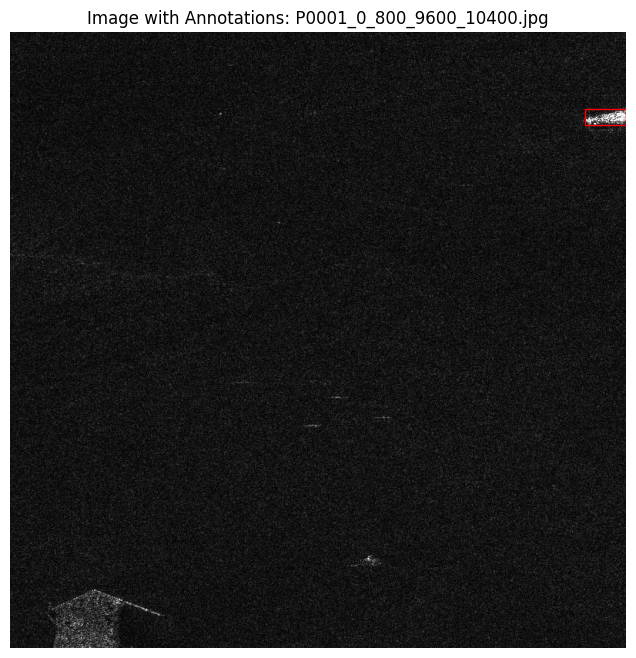

In [25]:
import os
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from customDataProcessing import CustomDataset

# Create an instance of CustomDataset
custom_dataset = CustomDataset(annotation_path, image_folder)

# Display images with bounding boxes
counter = 0
for image_info in custom_dataset.images:
    file_name = image_info['file_name']
    annotations = custom_dataset.get_annotations_for_image(file_name)

    image_path = os.path.join(image_folder, file_name)
    image = Image.open(image_path)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    ax = plt.gca()

    for annotation in annotations:
        bbox = annotation['bbox']
        rect = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.title(f"Image with Annotations: {file_name}")
    plt.axis('off')
    plt.show()
    counter += 1
    if counter == 5:
        break

Making the model and training

In [1]:
from ultralytics import YOLO

model = YOLO("yolov8m.pt", verbose=True)

100%|██████████| 49.7M/49.7M [00:01<00:00, 45.9MB/s]
